# **AstrID:**  *predictions*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import datetime
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS

# Import custom functions to extract our Image arrays and Pixel Mask arrays from our created fits files dataset
from dataGathering import extractImageArray, extractPixelMaskArray, extract_star_catalog
from dataGathering import getStarData, getCoordRangeFromPixels, getStarsInImage, getPixelCoordsFromStar, getImagePlot, getPixelMaskPlot
from dataGathering import displayRawImage, displayRawPixelMask, displayImagePlot, displayPixelMaskPlot, displayPixelMaskOverlayPlot

# Import custom function to preprocess Image and Pixel Mask arrays
from imageProcessing import normalizeImages, stackImages, stackMasks, preprocessImage

2024-11-15 10:57:58.780326: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-15 10:57:59.371980: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# getStarData('II/246', 50, 'validate')

In [3]:
# Create images and masks arrays lists
images = []
masks = []

# Create a list of all the wcs data in the dataset folder
wcs_data = []

# Create a dataframe to store the star data inside each fits file
stars_table = []

# Create df to store the star data inside each fits file
stars_in_image = []

# Create a list of all the fits files in the dataset folder
fits_files = os.listdir('data/fits/')
fits_files = [file for file in fits_files if file.startswith('validate')]

# For all the fits files in the dataset folder specified in file_path, extract the image and mask arrays to the respective lists
file_path = 'data/fits/'
for file in os.listdir(file_path):
    if file.endswith('.png'):
        os.remove(file_path + file)
    if file.startswith('validate') and file.endswith('.fits'):
        images.append(extractImageArray(file_path + file))
        masks.append(extractPixelMaskArray(file_path + file))
        wcs = wcs_data.append(WCS(fits.open(file_path + file)[0].header))
        stars_table.append(extract_star_catalog(file_path + file))
        stars_in_image.append(getStarsInImage(wcs, extract_star_catalog(file_path + file).to_pandas(), getCoordRangeFromPixels(WCS(fits.open(file_path + file)[0].header))))

        print(file + ' added to dataset')

Number of stars in catalog query:  505
validate46.fits added to dataset
Number of stars in catalog query:  480
validate20.fits added to dataset
Number of stars in catalog query:  575
validate15.fits added to dataset
Number of stars in catalog query:  1938
validate8.fits added to dataset
Number of stars in catalog query:  2725
validate23.fits added to dataset
Number of stars in catalog query:  772
validate28.fits added to dataset
Number of stars in catalog query:  689
validate25.fits added to dataset
Number of stars in catalog query:  627
validate29.fits added to dataset
Number of stars in catalog query:  551
validate44.fits added to dataset
Number of stars in catalog query:  3356
validate22.fits added to dataset
Number of stars in catalog query:  629
validate33.fits added to dataset
Number of stars in catalog query:  508
validate3.fits added to dataset
Number of stars in catalog query:  656
validate10.fits added to dataset
Number of stars in catalog query:  2059
validate48.fits added t

In [4]:
test_images = stackImages(images)
test_masks = stackMasks(masks)

### Normalize the Images

To standardize the pixel values in our images, we need to normalize them to a common range.
We will use min-max normalization to scale the pixel values to a range between 0.0 and 1.0.

In [5]:
normalized_images = normalizeImages(test_images)

0.0 1.0


In [6]:
# # Define batch size
# batch_size = 4

# # Use ImageDataGenerator to load data in batches
# test_datagen = ImageDataGenerator()

# test_generator = test_datagen.flow(test_images, test_masks, batch_size=batch_size)

## Choose the correct model from below:

In [7]:
# Display all the models in the models folder
saved_models_path = 'models/saved_models/'
model_files = os.listdir(saved_models_path)
model_files = [file for file in model_files if file.endswith('.keras')]
model_files = sorted(model_files)
model_files


['2024_10_25-0131_100unet_model.keras',
 '2024_10_25-0131_100unet_model_.keras',
 '2024_10_25-0131_10_unet_model_.keras',
 '2024_10_25-0131_150unet_model_.keras',
 '2024_10_27-2040_200_unet_model.keras',
 '2024_10_27-2206_200_unet_model.keras',
 '2024_11_08-0944_200_unet_model.keras',
 '2024_11_08-1004_200_unet_model.keras',
 '2024_11_08-1527_200_unet_model.keras',
 '2024_11_12-1329_200_unet_model.keras',
 '2024_11_12-1514_200_unet_model.keras',
 '2024_11_15-1005_200_unet_model.keras',
 '2024_11_15-1040_200_unet_model.keras']

In [8]:

model_choice = model_files[-1]

In [9]:
model_choice

'2024_11_15-1040_200_unet_model.keras'

In [10]:
# Load the saved model
model_choice = '2024_11_08-1527_200_unet_model.keras'
model = load_model(saved_models_path + model_choice)

2024-11-15 10:58:06.514158: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-15 10:58:06.534027: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-15 10:58:06.534094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-15 10:58:06.535510: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-15 10:58:06.535614: I tensorflow/compile

In [11]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_images, test_masks, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2024-11-15 10:58:09.286229: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-11-15 10:58:11.937464: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-15 10:58:12.280235: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-15 10:58:12.280401: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

1/2 [==============>...............] - ETA: 3s - loss: 0.0416 - accuracy: 0.9961

2024-11-15 10:58:14.325617: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


2/2 [==============================] - 6s 2s/step - loss: 0.0411 - accuracy: 0.9963
Test Loss: 0.0410831943154335
Test Accuracy: 0.9963020086288452


In [12]:
# Plot the loss and accuracy curves for the training and validation sets
def plot_metrics(history):
    # Define the figure and axis
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the loss
    ax[0].plot(history.history['loss'], label='Training Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    # Plot the accuracy
    ax[1].plot(history.history['accuracy'], label='Training Accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    # Display the plots
    plt.tight_layout()
    # plt.savefig('results/figures/' + model_choice + '_loss_accuracy_plot.png')
    plt.show()

In [13]:
import tensorflow as tf
from tensorflow.keras import backend as K
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU is available")
    
    # Clear GPU memory
    K.clear_session()
    tf.config.experimental.reset_memory_stats('GPU:0')

GPU is available


In [14]:
predictions = model.predict(test_images)

2/2 [==============================] - 0s 169ms/step


1/1 [==============================] - 0s 455ms/step


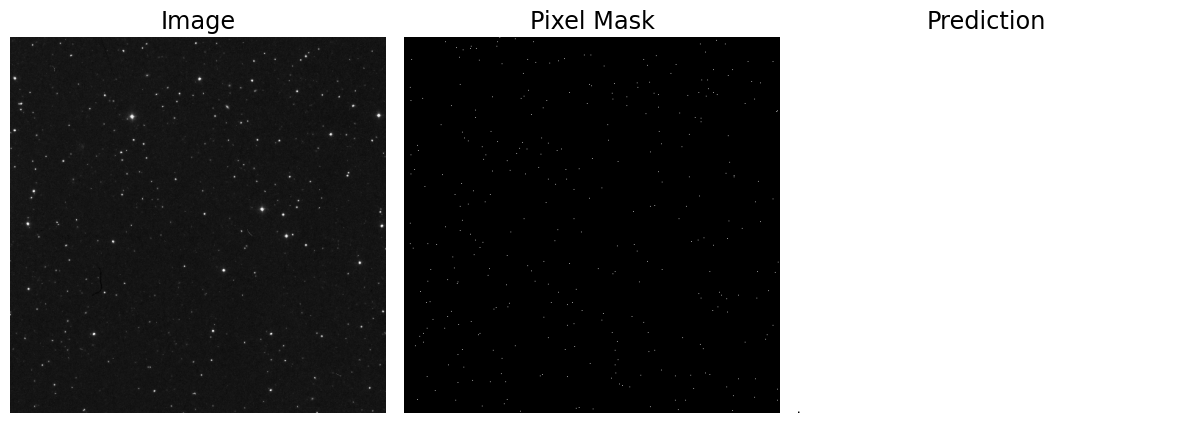

1/1 [==============================] - 0s 24ms/step


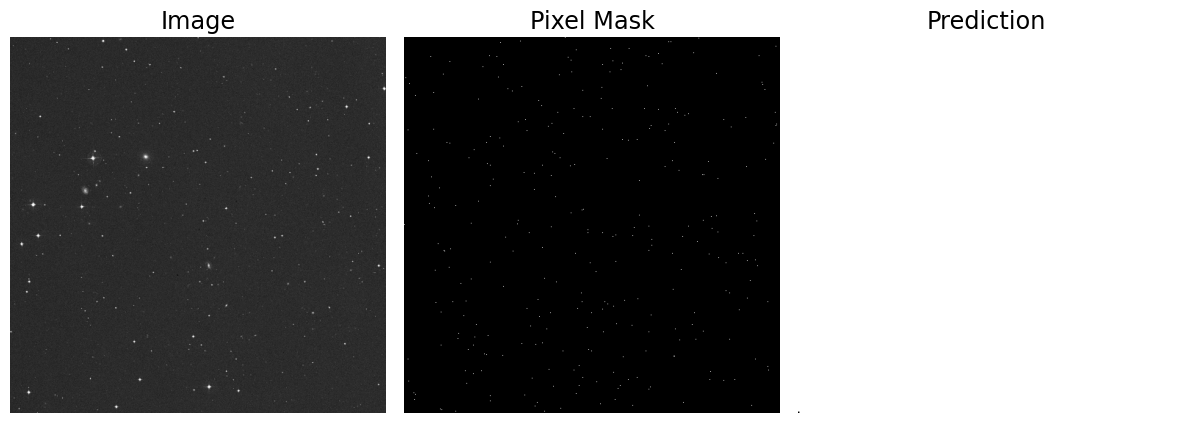

1/1 [==============================] - 0s 18ms/step


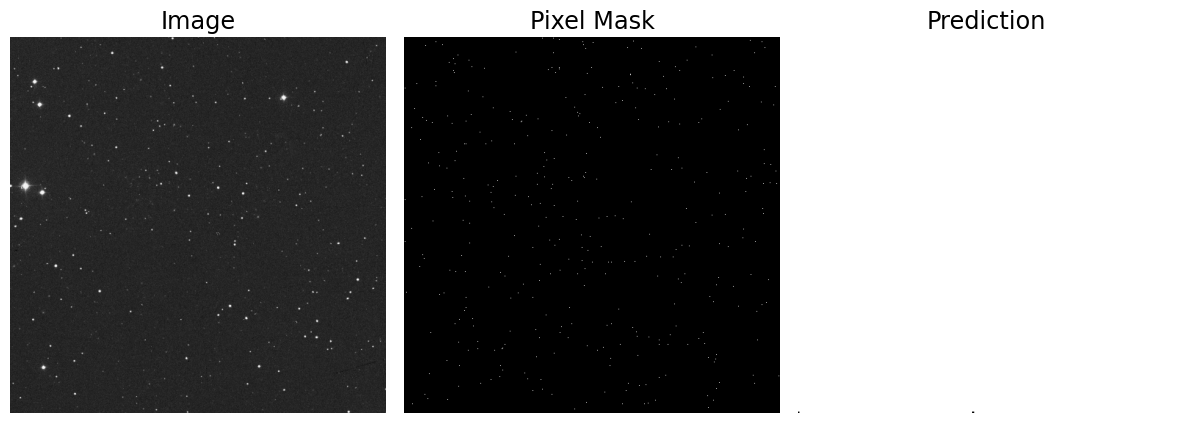

1/1 [==============================] - 0s 20ms/step


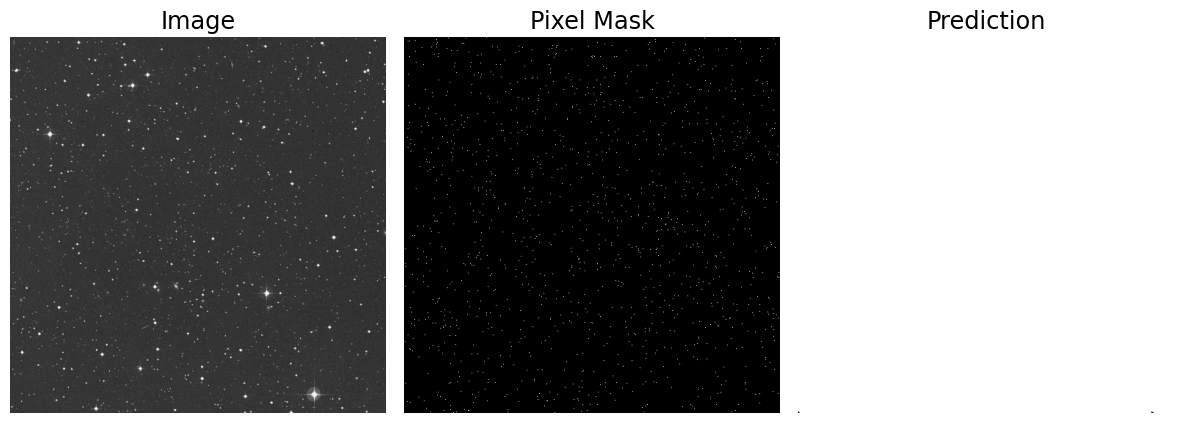

In [15]:
# Plot the results from the model
for i in range(4):
    image = images[i]
    new_image = test_images[i]
    normalized_image = test_images[i]
    mask = test_masks[i]
    pred_mask = model.predict(np.expand_dims(new_image, axis=0))[0]
    # pred_mask = predictions[i]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title('Image')

    plt.subplot(1, 3, 2)
    plt.imshow(mask[:, :, 0], cmap='gray')
    plt.axis('off')
    plt.title('Pixel Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask, cmap='gray')
    plt.axis('off')
    plt.title('Prediction')

    plt.tight_layout()
    plt.show()

In [16]:
def plot_image_mask_prediction_subplot(selection = 0):
    # Normalize the image to be between 0 and 1
    image = test_images[selection]
    image_normalized = normalized_images[selection]
    mask = test_masks[selection]
    pred_mask = model.predict(np.expand_dims(image, axis=0))[0]
    # Normalize the prediction mask to be between 0 and 1
    pred_mask_normalized = (pred_mask - pred_mask.min()) / (pred_mask.max() - pred_mask.min())
    wcs = wcs_data[selection]

    fig, ax = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': wcs})
    ax[0].imshow(image_normalized, cmap='gray', origin='lower')
    ax[0].set_title('Image')
    ax[0].coords.grid(True, color='white', ls='solid')
    ax[0].coords[0].set_axislabel('RA')
    ax[0].coords[1].set_axislabel('Dec')

    ax[1].imshow(mask[:, :, 0], cmap='gray', origin='lower')
    ax[1].set_title('Pixel Mask')
    ax[1].coords.grid(True, color='white', ls='solid')
    ax[1].coords[0].set_axislabel('RA')
    ax[1].coords[1].set_axislabel('Dec')

    ax[2].imshow(pred_mask_normalized[:, :, 0], cmap='gray', origin='lower')
    ax[2].set_title('Prediction')
    ax[2].coords.grid(True, color='white', ls='solid')
    ax[2].coords[0].set_axislabel('RA')
    ax[2].coords[1].set_axislabel('Dec')

    plt.show()

1/1 [==============================] - 0s 21ms/step


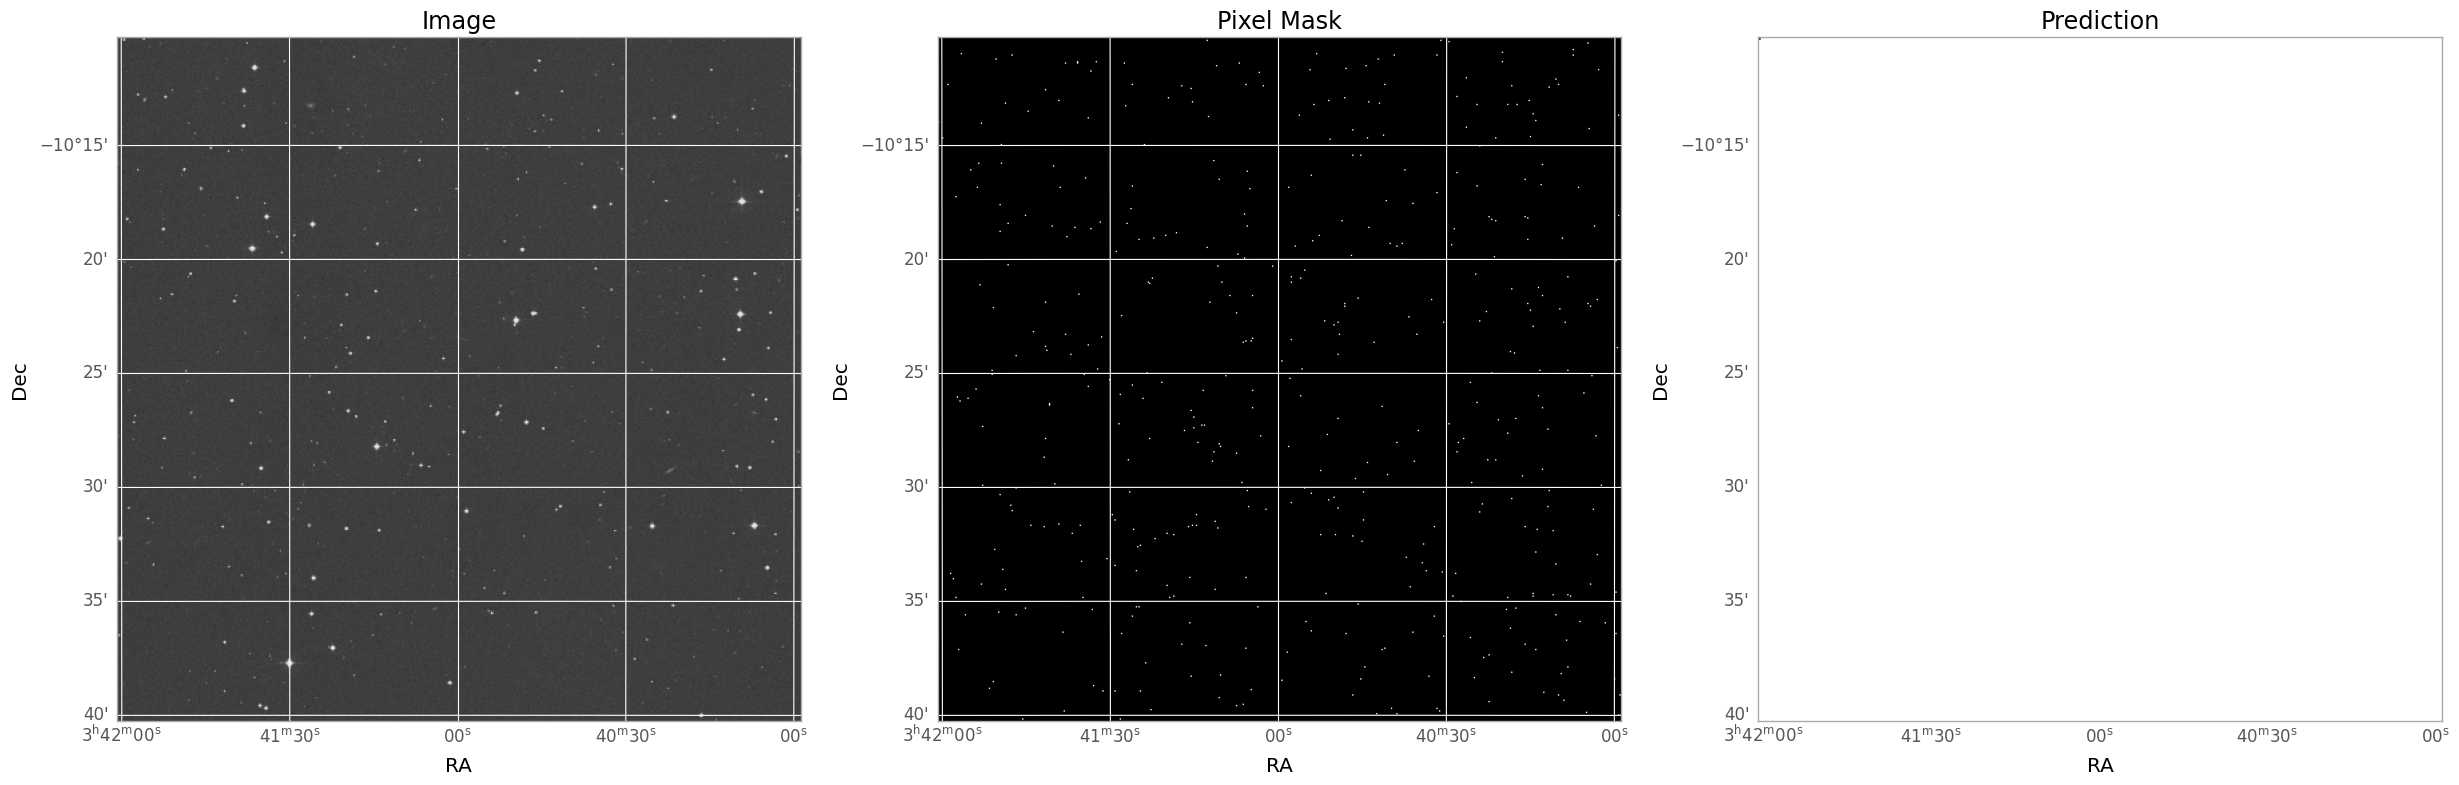

In [17]:
# Plot a random image mask prediction from the test set
selection = np.random.randint(0, len(test_images))
plot_image_mask_prediction_subplot(selection)


In [18]:
def save_image_mask_prediction_subplot(selection = 0):
    # Normalize the image to be between 0 and 1
    image = test_images[selection]
    image_normalized = normalized_images[selection]
    mask = test_masks[selection]
    pred_mask = model.predict(np.expand_dims(image, axis=0))[0]
    # Normalize the prediction mask to be between 0 and 1
    pred_mask_normalized = (pred_mask - pred_mask.min()) / (pred_mask.max() - pred_mask.min())
    wcs = wcs_data[selection]

    fig, ax = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': wcs})
    ax[0].imshow(image_normalized, cmap='gray', origin='lower')
    ax[0].set_title('Image')
    ax[0].coords.grid(True, color='white', ls='solid')
    ax[0].coords[0].set_axislabel('RA')
    ax[0].coords[1].set_axislabel('Dec')

    ax[1].imshow(mask[:, :, 0], cmap='gray', origin='lower')
    ax[1].set_title('Mask')
    ax[1].coords.grid(True, color='white', ls='solid')
    ax[1].coords[0].set_axislabel('RA')
    ax[1].coords[1].set_axislabel('Dec')

    ax[2].imshow(pred_mask_normalized[:, :, 0], cmap='gray', origin='lower')
    ax[2].set_title('Prediction')
    ax[2].coords.grid(True, color='white', ls='solid')
    ax[2].coords[0].set_axislabel('RA')
    ax[2].coords[1].set_axislabel('Dec')

    image_title = fits_files[selection] + " Image, Mask, and Prediction"
    plt.suptitle(image_title, fontsize=24)

    file_path = 'results/figures/prediction_subplot/' + fits_files[selection].replace('.fits', '.png')

    print(f'Saving image, mask, and prediction to {file_path}')

    plt.savefig(file_path)

1/1 [==============================] - 0s 16ms/step
Saving image, mask, and prediction to results/figures/prediction_subplot/validate48.png


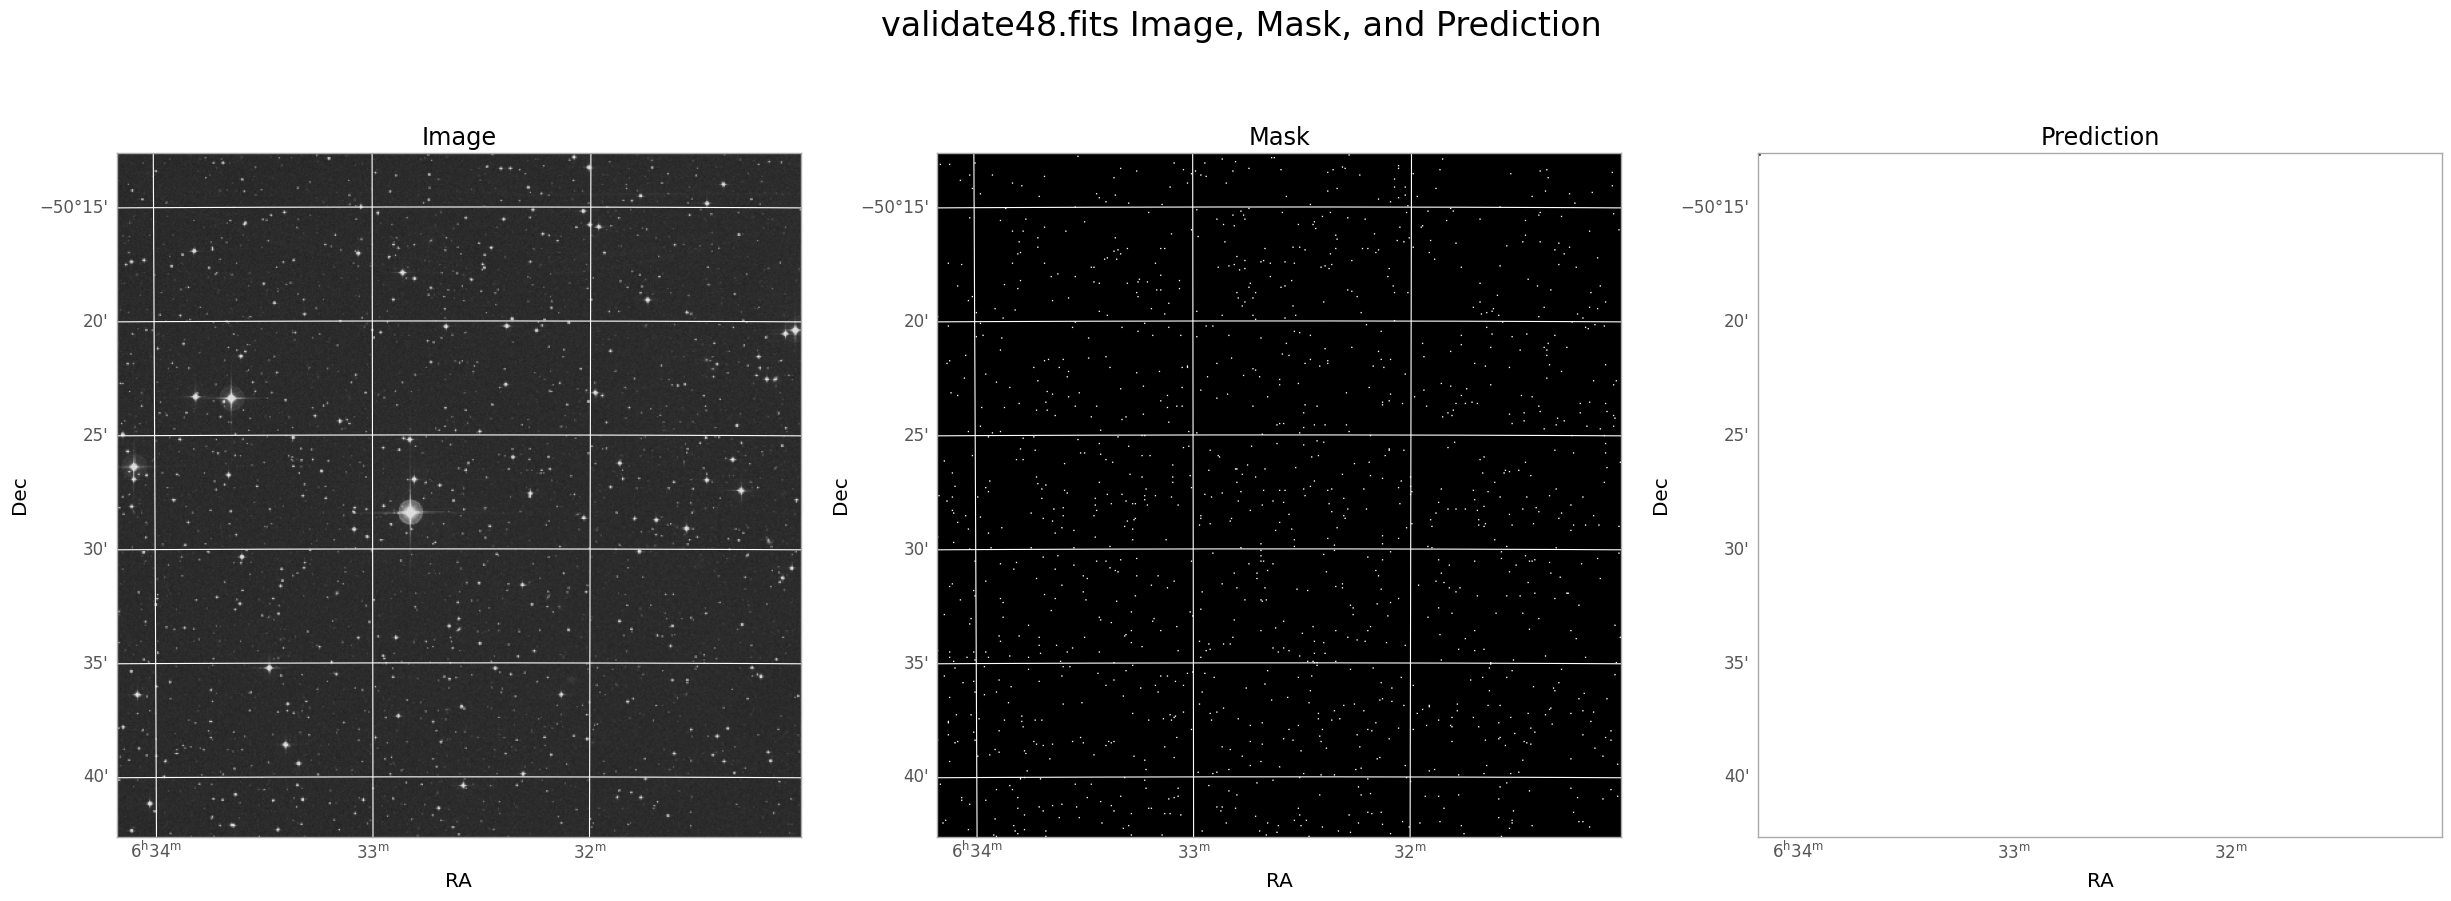

In [19]:
# Plot a random image mask prediction from the test set
choice = np.random.randint(0, len(test_images))
save_image_mask_prediction_subplot(selection = choice)

In [20]:

def extract_star_predictions(prediction, threshold=0.5):
    # Normalize the prediction array to be between 0 and 1
    prediction = (prediction - prediction.min()) / (prediction.max() - prediction.min())

    # Ensure the prediction array is 2D
    if prediction.ndim == 3:
        prediction = prediction[:, :, 0]

    # Threshold the prediction array to get the star locations
    stars = np.argwhere(prediction > threshold)

    # Create a list to store the star data
    star_data = []

    # Create a prediction mask of the same shape as the prediction array
    prediction_mask = np.zeros_like(prediction, dtype=np.uint8)

    # Iterate over the star locations and add them to the star data list and prediction mask
    for star in stars:
        y, x = star
        star_data.append((x, y))
        prediction_mask[y, x] = 1

    return star_data, prediction_mask

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch

def plot_prediction_overlay(selection=0, threshold=0.10):
    # Normalize the image to be between 0 and 1
    image = test_images[selection]
    image_normalized = normalized_images[selection]
    mask = test_masks[selection]
    stars = stars_in_image[selection]
    pred_star_data, prediction_mask = extract_star_predictions(model.predict(np.expand_dims(image, axis=0))[0], threshold=threshold)
    print(np.count_nonzero(prediction_mask))
    wcs = wcs_data[selection]


    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection=wcs)


    # Draw blue circles on the image for pixel mask
    x_dim = wcs.pixel_shape[0]
    y_dim = wcs.pixel_shape[1]

    # Pixel-mask of stars
    pixel_mask = np.zeros((x_dim, y_dim))

    print('Drawing')  # DEBUG

    for star in stars:
        pixel_coords = getPixelCoordsFromStar(star, wcs)
        # Ensure the pixel coordinates are within bounds
        x, y = int(np.round(pixel_coords[0])), int(np.round(pixel_coords[1]))
        if 0 <= x < x_dim and 0 <= y < y_dim:
            pixel_mask[x][y] = 1

        Drawing_colored_circle = plt.Circle((pixel_coords[0], pixel_coords[1]), 3, fill=False, edgecolor='blue', linewidth=0.75)
        ax.add_artist(Drawing_colored_circle)

    # Plot the image
    ax.imshow(image_normalized, cmap='gray', origin='lower')

    # Draw red circles on the image for star predictions
    x_dim = wcs.pixel_shape[0]
    y_dim = wcs.pixel_shape[1]

    # Pixel-mask of stars
    pixel_mask = np.zeros((x_dim, y_dim))

    print('Drawing')  # DEBUG

    for star in pred_star_data:
        pixel_coords = star
        # Ensure the pixel coordinates are within bounds
        x, y = int(np.round(pixel_coords[0])), int(np.round(pixel_coords[1]))
        if 0 <= x < x_dim and 0 <= y < y_dim:
            pixel_mask[x][y] = 1

        Drawing_colored_circle = plt.Circle((pixel_coords[0], pixel_coords[1]), 4, fill=False, edgecolor='red', linewidth=0.2)
        ax.add_artist(Drawing_colored_circle)

    ax.set_title(f'{fits_files[selection] + " with Star Location and Star Prediction Overlays"}')
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    ax.grid(color='white', ls='dotted')

    # Add legend
    def make_legend_circle(legend, orig_handle, xdescent, ydescent, width, height, fontsize):
        return Circle((width / 2, height / 2), 0.25 * height, fill=False, edgecolor=orig_handle.get_edgecolor(), linewidth=orig_handle.get_linewidth())


    # Display a legend for the circles
    blue_circle = Circle((0, 0), 1, fill=False, edgecolor='blue', linewidth=1)
    red_circle = Circle((0, 0), 1, fill=False, edgecolor='red', linewidth=1)
    ax.legend([blue_circle, red_circle], ['Star Location', 'Star Prediction'], loc='upper right', handler_map={Circle: HandlerPatch(patch_func=make_legend_circle)})


    plt.show()

In [ ]:
plot_prediction_overlay(0, threshold=0.11)

1/1 [==============================] - 0s 15ms/step
262140
Drawing
Drawing


KeyboardInterrupt: 

In [ ]:
def save_image_mask_prediction_overlay(selection=0, threshold=0.11):
    # Normalize the image to be between 0 and 1
    image = test_images[selection]
    image_normalized = (image - image.min()) / (image.max() - image.min())
    mask = test_masks[selection]
    stars = stars_in_image[selection]
    pred_star_data, prediction_mask = extract_star_predictions(model.predict(np.expand_dims(image, axis=0))[0], threshold=threshold)
    print(np.count_nonzero(prediction_mask))
    wcs = wcs_data[selection]


    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection=wcs)


    # Draw blue circles on the image for pixel mask
    x_dim = wcs.pixel_shape[0]
    y_dim = wcs.pixel_shape[1]

    # Pixel-mask of stars
    pixel_mask = np.zeros((x_dim, y_dim))

    print('Drawing')  # DEBUG

    for star in stars:
        pixel_coords = getPixelCoordsFromStar(star, wcs)
        # Ensure the pixel coordinates are within bounds
        x, y = int(np.round(pixel_coords[0])), int(np.round(pixel_coords[1]))
        if 0 <= x < x_dim and 0 <= y < y_dim:
            pixel_mask[x][y] = 1

        Drawing_colored_circle = plt.Circle((pixel_coords[0], pixel_coords[1]), 3, fill=False, edgecolor='blue', linewidth=0.75)
        ax.add_artist(Drawing_colored_circle)

    # Plot the image
    ax.imshow(image_normalized, cmap='gray', origin='lower')

    # Draw red circles on the image for star predictions
    x_dim = wcs.pixel_shape[0]
    y_dim = wcs.pixel_shape[1]

    # Pixel-mask of stars
    pixel_mask = np.zeros((x_dim, y_dim))

    print('Drawing')  # DEBUG

    for star in pred_star_data:
        pixel_coords = star
        # Ensure the pixel coordinates are within bounds
        x, y = int(np.round(pixel_coords[0])), int(np.round(pixel_coords[1]))
        if 0 <= x < x_dim and 0 <= y < y_dim:
            pixel_mask[x][y] = 1

        Drawing_colored_circle = plt.Circle((pixel_coords[0], pixel_coords[1]), 4, fill=False, edgecolor='red', linewidth=0.2)
        ax.add_artist(Drawing_colored_circle)

    image_title = fits_files[selection] + " with Star Location and Star Prediction Overlays" 
    ax.set_title(f'{image_title}')
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    ax.grid(color='white', ls='dotted')

    # Add legend
    def make_legend_circle(legend, orig_handle, xdescent, ydescent, width, height, fontsize):
        return Circle((width / 2, height / 2), 0.25 * height, fill=False, edgecolor=orig_handle.get_edgecolor(), linewidth=orig_handle.get_linewidth())


    # Display a legend for the circles
    blue_circle = Circle((0, 0), 1, fill=False, edgecolor='blue', linewidth=1)
    red_circle = Circle((0, 0), 1, fill=False, edgecolor='red', linewidth=1)
    ax.legend([blue_circle, red_circle], ['Pixel Mask', 'Star Prediction'], loc='upper right', handler_map={Circle: HandlerPatch(patch_func=make_legend_circle)})
    
    file_path = 'results/figures/prediction_overlay/' + fits_files[selection].replace('.fits', '.png')

    print(f'Saving image with mask and prediction overlays to {file_path}')

    plt.savefig(file_path)

In [ ]:
# # Iterate over the test set and save the image with overlayed mask and prediction to a file
# for i in range(len(test_images)):
#     save_image_mask_prediction_subplot(selection=i)
#     save_image_mask_prediction_overlay(selection=i)